# Capstone 3

## 1. Data wrangling

In [1]:
# Import os and modules

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib.dates import (DateFormatter, MinuteLocator, AutoDateLocator, AutoDateFormatter, datestr2num)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
# Import data

market= pd.read_csv(r"C:\Users\crathgeb-pc\Desktop\jup_ntb\capstone_3\marketing_campaign.csv", sep="\t")

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 1.1. Exploration

In [4]:
market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
market.shape

(2240, 29)

In [6]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
market.describe(include = 'object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [8]:
market['date'] = pd.to_datetime(market['Dt_Customer'], format='%d-%m-%Y') 

In [9]:
market.describe(include = 'int64')

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
cat_feats = market[['Education', 'Marital_Status']].copy()

In [11]:
cat_feats.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


## 1.2. Cleaning

In [12]:
null = market[market.isna().any(axis=1)]

In [13]:
null

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,0,3,11,0,2013-11-15
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,0,3,11,0,2013-02-20
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,0,0,0,0,0,0,3,11,0,2013-11-05
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,0,0,0,0,0,0,3,11,0,2014-01-01
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,0,0,0,0,0,3,11,0,2013-06-17
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,0,3,11,0,2012-09-14
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,0,3,11,0,2012-11-19
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,0,3,11,0,2014-05-27
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,0,0,0,0,0,0,3,11,0,2013-11-23
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,0,3,11,0,2013-07-11


In [14]:
market.isnull().sum(axis = 0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
date                    0
dtype: int64

The only column with any null values appears to be income.  24 observations out of 2240 is a small enough proportion that I would feel comfortable dropping these rows or imputing the missing values .  However, I want to be sure that there are not any trends amoung these values that might be important to recognize before changing or removing these observations.

In [15]:
null.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,24.000000,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.0,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.0,24.000000
mean,5943.625000,1967.458333,NaN,0.666667,0.583333,58.041667,197.208333,21.333333,162.708333,27.166667,...,5.083333,0.0,0.125000,0.041667,0.083333,0.0,0.0,3.0,11.0,0.041667
std,3028.349268,12.021644,NaN,0.637022,0.583592,29.492046,242.479758,38.310705,339.420411,41.281290,...,2.586195,0.0,0.337832,0.204124,0.282330,0.0,0.0,0.0,0.0,0.204124
min,1295.000000,1943.000000,NaN,0.000000,0.000000,4.000000,5.000000,0.000000,3.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
25%,3063.250000,1957.750000,NaN,0.000000,0.000000,35.500000,22.000000,1.000000,14.500000,2.000000,...,3.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
50%,5526.500000,1969.500000,NaN,1.000000,1.000000,62.000000,76.000000,3.500000,35.000000,8.000000,...,6.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
75%,8597.750000,1974.250000,NaN,1.000000,1.000000,82.250000,286.000000,24.250000,177.000000,40.750000,...,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
max,10629.000000,1989.000000,NaN,2.000000,2.000000,96.000000,861.000000,138.000000,1607.000000,164.000000,...,9.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,3.0,11.0,1.000000


In [16]:
df_diff = pd.concat([market, null]).drop_duplicates(keep=False)

In [17]:
df_diff

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,2012-09-04
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2014-03-08
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,2014-02-10
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,2013-06-13
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,2014-06-10
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,2014-01-25
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,2014-01-24


In [18]:
df_diff.mean().compare(null.mean())

,self,other
ID,5588.353339,5943.625000
Year_Birth,1968.820397,1967.458333
Income,52247.251354,NaN
Kidhome,0.441787,0.666667
Teenhome,0.505415,0.583333
Recency,49.012635,58.041667
MntWines,305.091606,197.208333
MntFruits,26.356047,21.333333
MntMeatProducts,166.995939,162.708333
MntFishProducts,37.637635,27.166667


<AxesSubplot: title={'center': 'Rows with nan values'}>

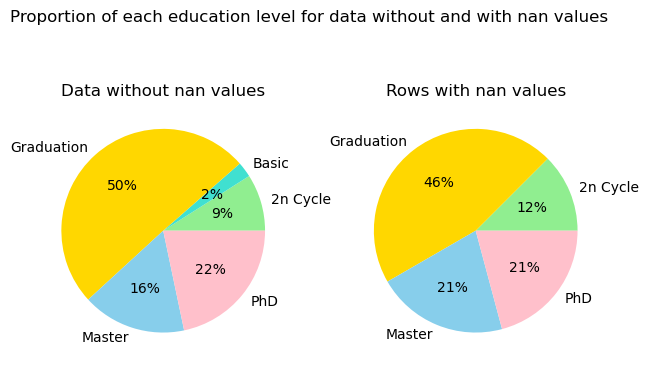

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

ax1.set_title('Data without nan values')

ax2.set_title('Rows with nan values')

plt.suptitle("Proportion of each education level for data without and with nan values")
df_diff.groupby('Education').size().plot(kind='pie', colors=['lightgreen', 'turquoise', 'gold', 'skyblue', 'pink'], autopct='%.0f%%', ax=ax1)
null.groupby('Education').size().plot(kind='pie', colors=['lightgreen', 'gold', 'skyblue', 'pink', 'orange'], autopct='%.0f%%', ax=ax2)

<AxesSubplot: title={'center': 'Rows with nan values'}>

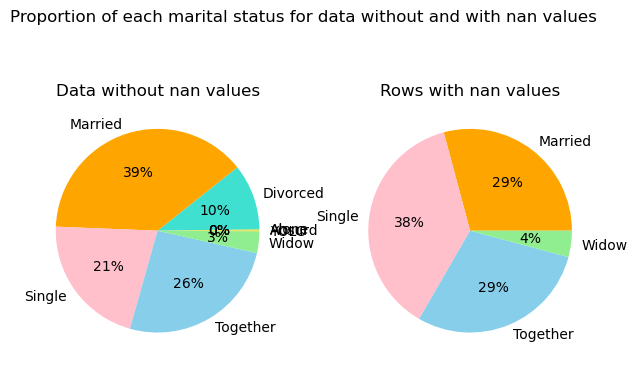

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.tight_layout()

ax1.set_title('Data without nan values')
ax2.set_title('Rows with nan values')
plt.suptitle("Proportion of each marital status for data without and with nan values")

df_diff.groupby('Marital_Status').size().plot(kind='pie', colors=['lightgreen', 'gold', 'turquoise', 'orange', 'pink', 'skyblue'], autopct='%.0f%%', ax=ax1)
null.groupby('Marital_Status').size().plot(kind='pie', colors=['orange', 'pink', 'skyblue', 'lightgreen'], autopct='%.0f%%', ax=ax2)

Education levels for both groups appear quite similar, and some of marital status groups appear similar, such as "Together" and "Widow."  I have some concerns that the groups for "Married", "Single", and "Divorced" are not very similar.  I wonder whether divorced individuals are grouped with single individuals for the nan rows?  This is something that we might spend more time considering and perhaps consult with the company to discover how this information was gathered and whether there is reason to be concerned that the nan rows are reflecting a particular group of customers.  As this is a relatively small group, I think that we could be ok with dropping the rows or replacing the nan for income with the mean or median for the column.  However, before I impute the missing values, I am also going to create a new column to track whether or not an observation was part of this group with missing income values.  This will allow us to examine being in this group might be a reflection of an important quality.

In [21]:
market['nan'] = market.isna().sum(axis=1).apply(lambda x: 0 if x==0 else 1)

In [22]:
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date,nan
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,2012-09-04,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2014-03-08,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2013-08-21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,2014-02-10,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,2014-01-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,2013-06-13,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,2014-06-10,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,2014-01-25,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,2014-01-24,0


In [23]:
market.loc[market['nan'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date,nan
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,3,11,0,2013-11-15,1
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,3,11,0,2013-02-20,1
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,0,0,0,0,0,3,11,0,2013-11-05,1
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,0,0,0,0,0,3,11,0,2014-01-01,1
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,0,0,0,0,3,11,0,2013-06-17,1
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,3,11,0,2012-09-14,1
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,3,11,0,2012-11-19,1
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,3,11,0,2014-05-27,1
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,0,0,0,0,0,3,11,0,2013-11-23,1
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,3,11,0,2013-07-11,1


In [24]:
market['Income'].fillna((market['Income'].mean()), inplace=True)

In [25]:
any(market['ID'].duplicated())

False

## 1.3. Organization

In [26]:
market['children'] = market['Kidhome']+market['Teenhome']
market = market.drop(['Kidhome', 'Teenhome'], axis=1)

In [27]:
market['offer_accept'] = market['AcceptedCmp1']+market['AcceptedCmp2']+market['AcceptedCmp3']+market['AcceptedCmp4']+market['AcceptedCmp5']+market['Response']
market = market.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1)

In [28]:
market['num_purchases'] = market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']
market = market.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1)

In [29]:
market['enroll_yr'] = pd.DatetimeIndex(market['Dt_Customer']).year
market = market.drop(['Dt_Customer', 'date'], axis=1)

# 2. Exploratory Data Analysis

## 2.1. Univariate analysis

### 2.2.1. Numeric variables

<AxesSubplot: >

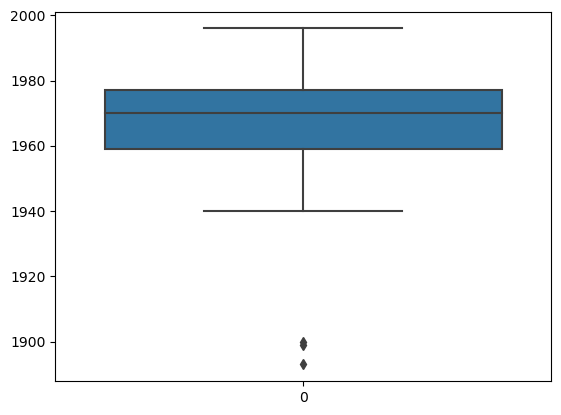

In [30]:
sns.boxplot(market['Year_Birth'])

<AxesSubplot: >

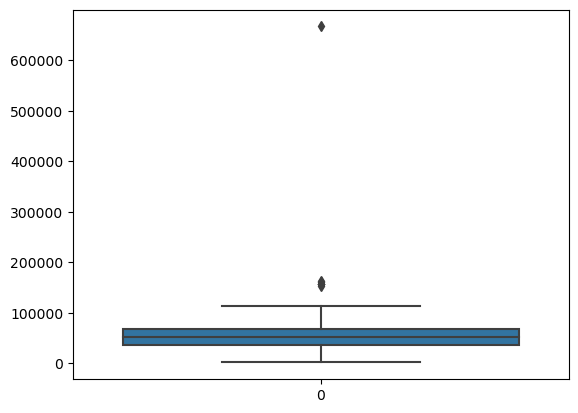

In [31]:
sns.boxplot(market['Income'])

In [32]:
market = market.drop(market[market['Income'] > 500000].index)

In [33]:
newdf = market.select_dtypes(include='int64')

<Figure size 640x480 with 0 Axes>

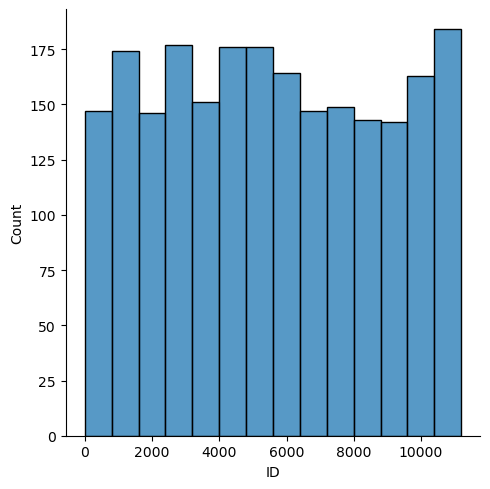

<Figure size 640x480 with 0 Axes>

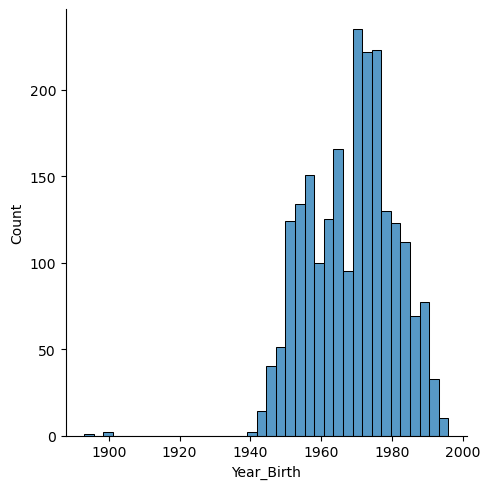

<Figure size 640x480 with 0 Axes>

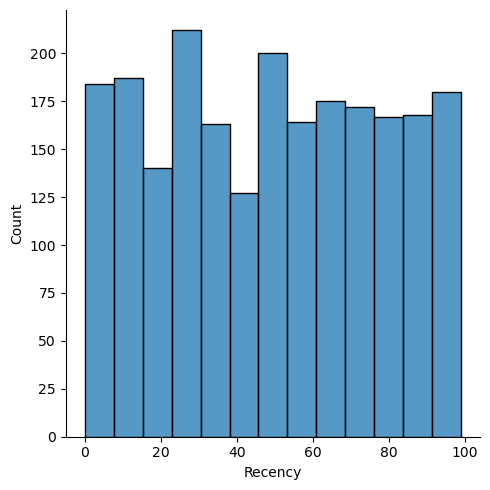

<Figure size 640x480 with 0 Axes>

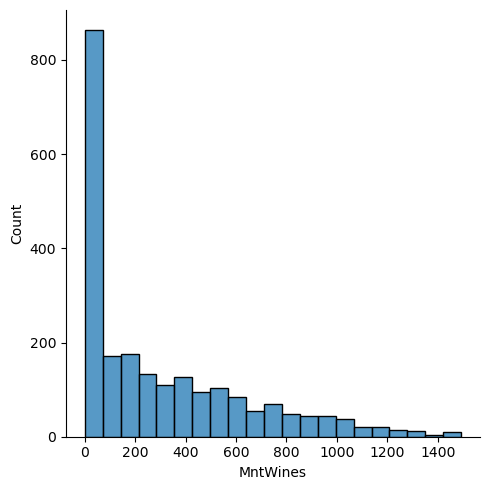

<Figure size 640x480 with 0 Axes>

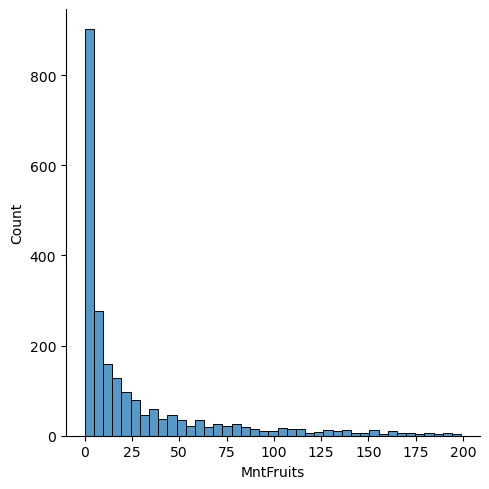

<Figure size 640x480 with 0 Axes>

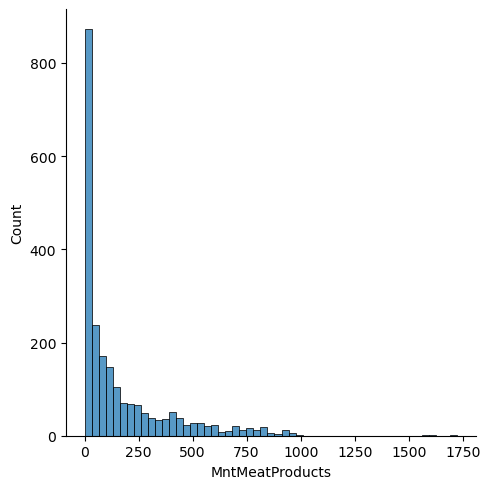

<Figure size 640x480 with 0 Axes>

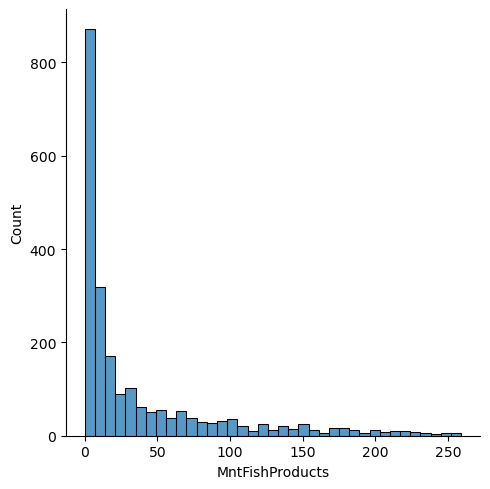

<Figure size 640x480 with 0 Axes>

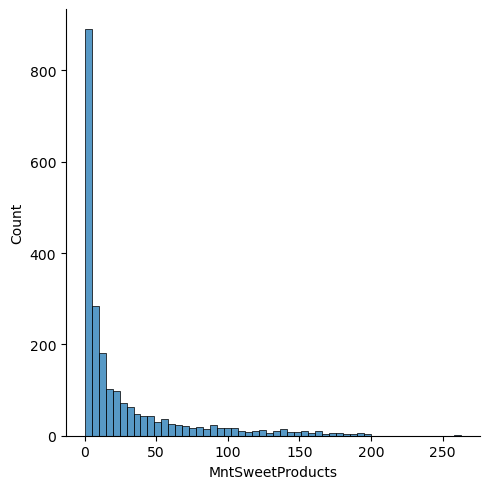

<Figure size 640x480 with 0 Axes>

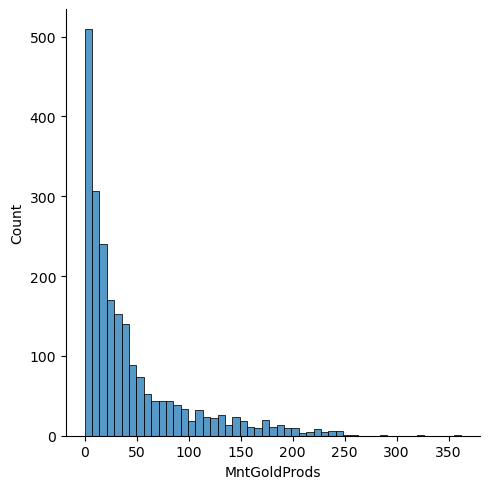

<Figure size 640x480 with 0 Axes>

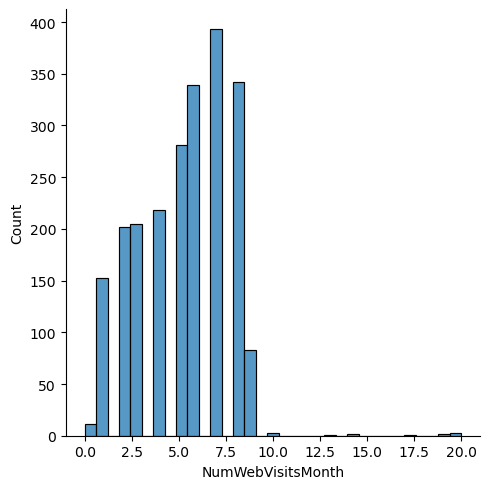

<Figure size 640x480 with 0 Axes>

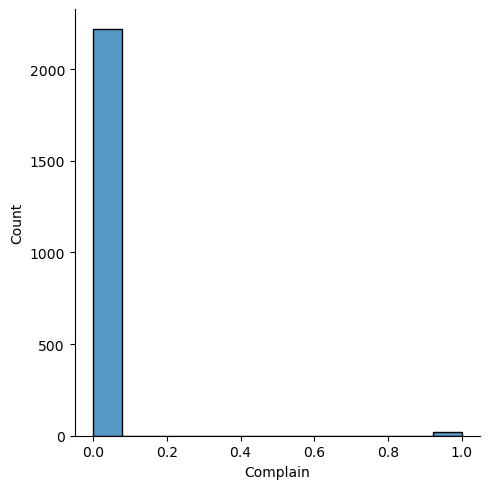

<Figure size 640x480 with 0 Axes>

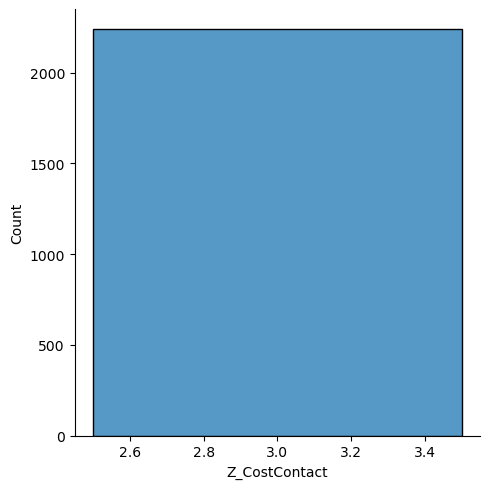

<Figure size 640x480 with 0 Axes>

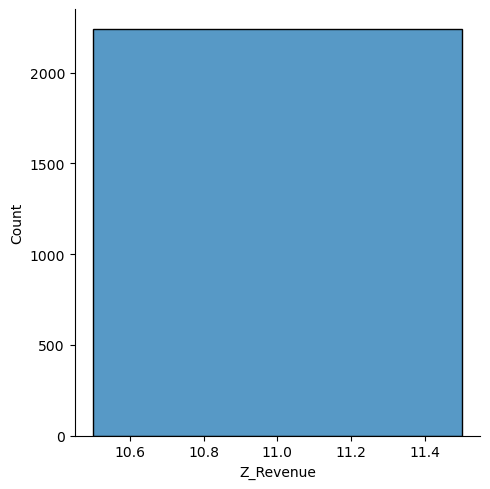

<Figure size 640x480 with 0 Axes>

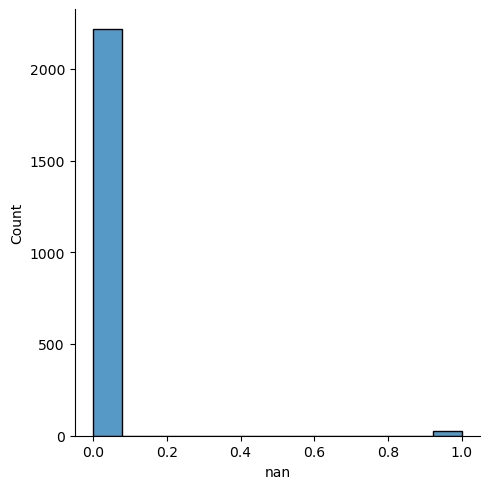

<Figure size 640x480 with 0 Axes>

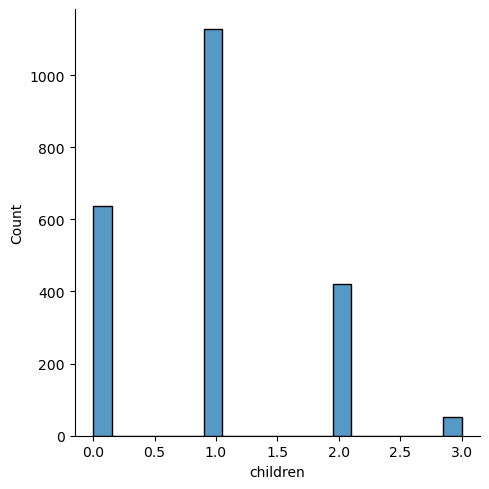

<Figure size 640x480 with 0 Axes>

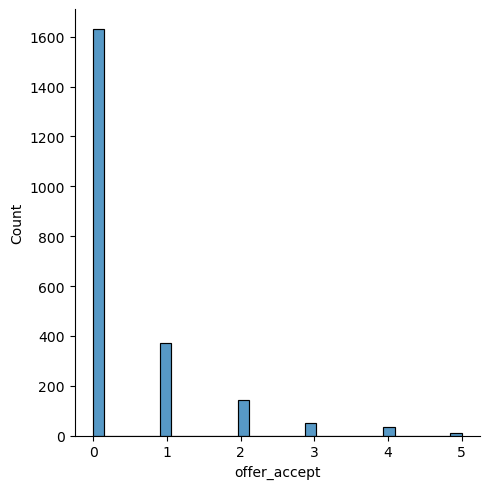

<Figure size 640x480 with 0 Axes>

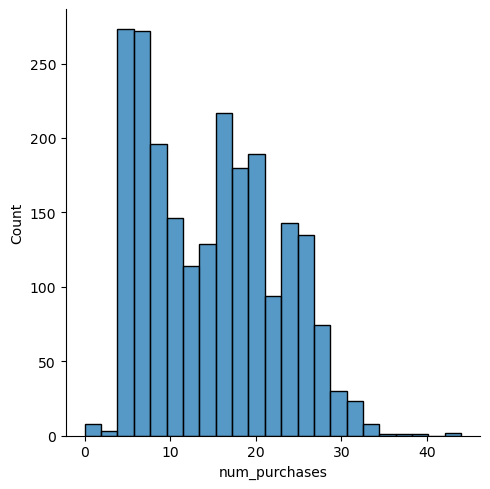

<Figure size 640x480 with 0 Axes>

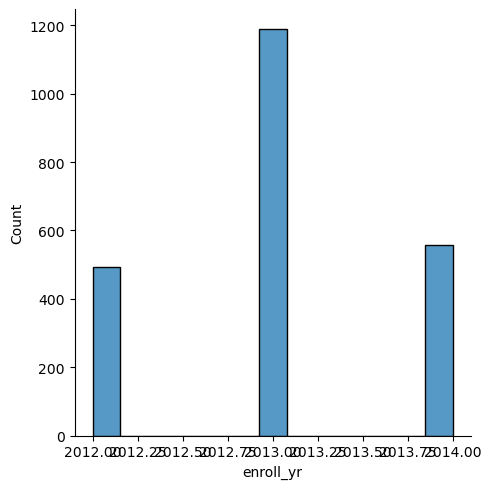

In [34]:
for column in newdf.columns:
    plt.figure()
    sns.displot(newdf[column])

In [35]:
min(market['Year_Birth']), max(market['Year_Birth'])

(1893, 1996)

In [36]:
market.loc[market['Year_Birth'] < 1940]

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,nan,children,offer_accept,num_purchases,enroll_yr
192,7829,1900,2n Cycle,Divorced,36640.0,99,15,6,8,7,...,25,5,1,3,11,0,1,0,6,2013
239,11004,1893,2n Cycle,Single,60182.0,23,8,0,5,7,...,2,4,0,3,11,0,1,0,4,2014
339,1150,1899,PhD,Together,83532.0,36,755,144,562,104,...,224,1,0,3,11,0,0,1,15,2013


Having only three values before 1940, all of which are 1900 or before, these observations are clearly outliers.  Whether due to an error or because these customers are well outside the usual birth year range for customers, I do not have enough information to determine.  However, I will drop these rows so that they not sway or confuse our analysis.

In [37]:
market = market.drop(market[market['Year_Birth'] < 1940].index)

In [38]:
market = market.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

The distribution of all the numeric variables appear to make logical sense.  Distribution graphs for binary variables are not very useful, but we can see that variables we expect to be binary behave as expected.  Z_CostContact and Z_Revenue are zero variation variables and therefore not useful for analysis.  Everything else looks good.

### 2.2.2. Categorial variables

<AxesSubplot: title={'center': 'Number of customers by feature'}, xlabel='Marital status', ylabel='Frequency'>

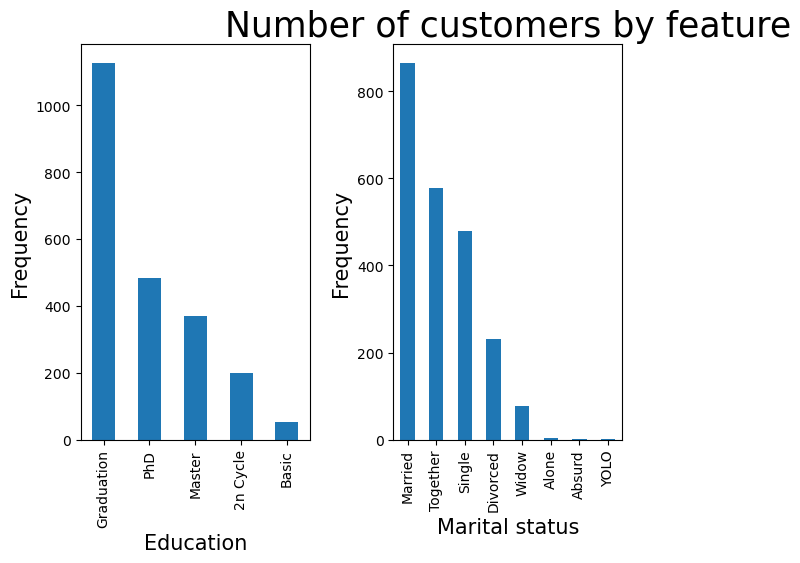

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlabel('Education', fontsize = 15)
ax1.set_ylabel('Frequency', fontsize = 15)

ax2.set_xlabel('Marital status', fontsize = 15)
ax2.set_ylabel('Frequency', fontsize = 15)

fig.tight_layout()

plt.title("Number of customers by feature", fontsize = 25)

pd.value_counts(market['Education']).plot(kind='bar', ax=ax1)
pd.value_counts(market['Marital_Status']).plot(kind='bar', ax=ax2)

In [40]:
market.loc[market["Marital_Status"] == "Alone", "Marital_Status"] = "Single"
market.loc[market["Marital_Status"] == "Divorced", "Marital_Status"] = "Single"
market.loc[market["Marital_Status"] == "Widow", "Marital_Status"] = "Single"
market.loc[market["Education"] == "Basic", "Education"] = "Graduation"
market.loc[market["Education"] == "2n Cycle", "Education"] = "Master"

In [41]:
market = market[(market['Marital_Status'] != 'Absurd') & (market['Marital_Status'] != 'YOLO')]

<AxesSubplot: title={'center': 'Customers by marital status'}>

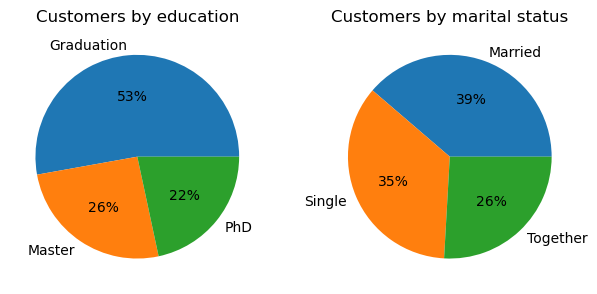

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('Customers by education', fontsize = 15)
ax2.set_title('Customers by marital status', fontsize = 15)

fig.tight_layout()

market.groupby('Education').size().plot(kind='pie', title='Customers by education', autopct='%.0f%%', ax=ax1)
market.groupby('Marital_Status').size().plot(kind='pie', title='Customers by marital status', autopct='%.0f%%', ax=ax2)

## 2.2. Bivariate analysis

In [43]:
market.corr()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,nan,children,offer_accept,num_purchases,enroll_yr
ID,1.000000,0.001862,0.000657,-0.046415,-0.020938,0.006909,-0.001942,-0.023448,-0.006441,-0.011160,-0.008052,0.031641,0.011421,-0.000868,-0.037658,-0.022497,-0.006724
Year_Birth,0.001862,1.000000,-0.200065,-0.019242,-0.163582,-0.014800,-0.029779,-0.044015,-0.020284,-0.060274,0.118514,-0.004381,-0.012751,-0.095127,0.004677,-0.180760,-0.022563
Income,0.000657,-0.200065,1.000000,0.007577,0.686087,0.504236,0.684522,0.518160,0.518240,0.382644,-0.646244,-0.027859,0.001463,-0.339692,0.341377,0.666235,0.026785
Recency,-0.046415,-0.019242,0.007577,1.000000,0.016345,-0.004807,0.022799,0.000056,0.021875,0.016722,-0.020112,0.005243,0.032014,0.018103,-0.089575,0.006525,-0.027540
MntWines,-0.020938,-0.163582,0.686087,0.016345,1.000000,0.388657,0.562460,0.400321,0.385814,0.387349,-0.320619,-0.035959,-0.033078,-0.351627,0.489170,0.712883,-0.153633
MntFruits,0.006909,-0.014800,0.504236,-0.004807,0.388657,1.000000,0.542225,0.593343,0.567233,0.387852,-0.415876,-0.002741,-0.012897,-0.393183,0.170396,0.456092,-0.055166
MntMeatProducts,-0.001942,-0.029779,0.684522,0.022799,0.562460,0.542225,1.000000,0.568701,0.524091,0.349314,-0.539149,-0.020752,-0.001963,-0.501753,0.331111,0.554926,-0.084105
MntFishProducts,-0.023448,-0.044015,0.518160,0.000056,0.400321,0.593343,0.568701,1.000000,0.581663,0.417172,-0.443468,-0.018715,-0.019626,-0.423807,0.177178,0.470144,-0.068310
MntSweetProducts,-0.006441,-0.020284,0.518240,0.021875,0.385814,0.567233,0.524091,0.581663,1.000000,0.370137,-0.423264,-0.020483,0.007847,-0.383182,0.198278,0.472979,-0.073008
MntGoldProds,-0.011160,-0.060274,0.382644,0.016722,0.387349,0.387852,0.349314,0.417172,0.370137,1.000000,-0.246051,-0.029779,0.010873,-0.262858,0.199691,0.494824,-0.142283


[Text(0.5, 1.0, 'Correlation matrix')]

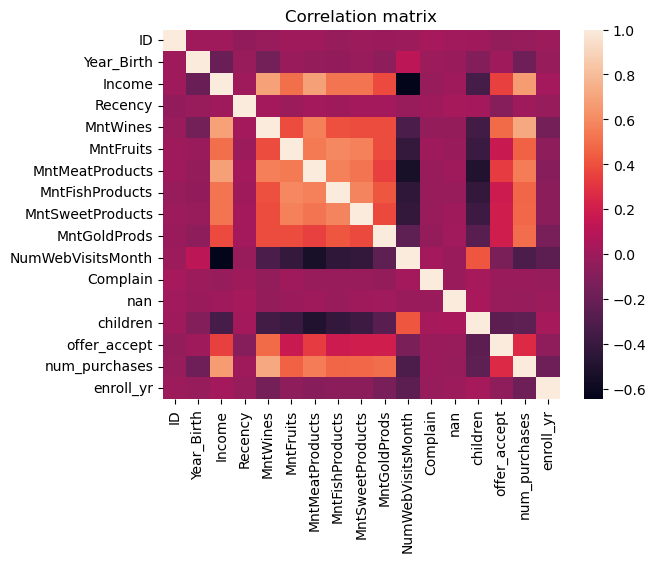

In [44]:
corr = market.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values).set(title='Correlation matrix')

In [45]:
market.corr().unstack().sort_values().drop_duplicates().head(15)

NumWebVisitsMonth  Income              -0.646244
MntMeatProducts    NumWebVisitsMonth   -0.539149
children           MntMeatProducts     -0.501753
MntFishProducts    NumWebVisitsMonth   -0.443468
children           MntFishProducts     -0.423807
MntSweetProducts   NumWebVisitsMonth   -0.423264
NumWebVisitsMonth  MntFruits           -0.415876
children           MntFruits           -0.393183
MntSweetProducts   children            -0.383182
MntWines           children            -0.351627
children           Income              -0.339692
MntWines           NumWebVisitsMonth   -0.320619
NumWebVisitsMonth  num_purchases       -0.313376
MntGoldProds       children            -0.262858
offer_accept       children            -0.252884
dtype: float64

In [46]:
market.corr().unstack().sort_values(ascending=False).drop_duplicates().head(15)

ID                ID                  1.000000
num_purchases     MntWines            0.712883
Income            MntWines            0.686087
MntMeatProducts   Income              0.684522
Income            num_purchases       0.666235
MntFishProducts   MntFruits           0.593343
MntSweetProducts  MntFishProducts     0.581663
MntFishProducts   MntMeatProducts     0.568701
MntSweetProducts  MntFruits           0.567233
MntWines          MntMeatProducts     0.562460
MntMeatProducts   num_purchases       0.554926
                  MntFruits           0.542225
MntSweetProducts  MntMeatProducts     0.524091
Income            MntSweetProducts    0.518240
                  MntFishProducts     0.518160
dtype: float64

# Preparing and saving data

In [47]:
market.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumWebVisitsMonth      int64
Complain               int64
nan                    int64
children               int64
offer_accept           int64
num_purchases          int64
enroll_yr              int64
dtype: object

In [48]:
market = pd.get_dummies(market)

In [49]:
df = market.copy()
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns)

In [50]:
market.to_pickle("cleaned_market.pkl")

In [51]:
market.to_csv("market.csv")